In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from math import sqrtfrom statsmodels.tsa.ar_model import AutoReg
from math import sqrt
%matplotlib inline

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

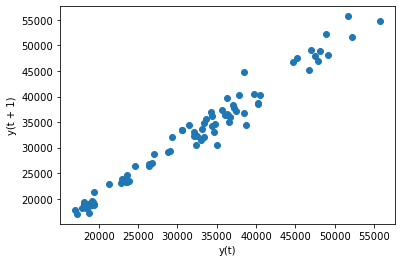

In [2]:
bitcoin = pd.read_csv("3monthbtc.csv")
series = bitcoin["Closing Price (USD)"]
lag_plot(series)

In [3]:
values = pd.DataFrame(series.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t-1', 't+1']
df

,t-1,t+1
0,NaN,18591.856605
1,18591.856605,18629.995537
2,18629.995537,18469.200469
3,18469.200469,19045.736466
4,19045.736466,18746.934807
...,...,...
87,48125.992195,48840.414475
88,48840.414475,52165.302555
89,52165.302555,51728.508797
90,51728.508797,55719.204362


predicted=40477.393429, expected=38461.681403
predicted=38652.406780, expected=44716.685469
predicted=44852.604973, expected=46674.851688
predicted=46793.613888, expected=45237.475689
predicted=45368.832069, expected=47500.897524
predicted=47612.421973, expected=47884.182862
predicted=47992.348994, expected=47005.190649
predicted=47121.058444, expected=49151.167576
predicted=49248.232484, expected=48125.992195
predicted=48232.039612, expected=48840.414475
predicted=48940.202178, expected=52165.302555
predicted=52235.957841, expected=51728.508797
predicted=51802.991236, expected=55719.204362
predicted=55758.720629, expected=54801.648644
Test RMSE: 2461.665


/usr/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


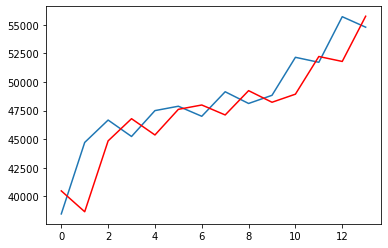

In [29]:
X = series.values
train, test = X[1:len(X)-14], X[len(X)-14:]
window = 1
model = AutoReg(train, lags=window)
model_fit=model.fit()
coef = model_fit.params
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
rmse = sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')